# UC San Diego MBB Performance Analysis
# By Wael Ivie
## 2/4/20 (Work in progress..)

In [1]:
#Importing packages
#
# You can delete whatever package(s) you chose..
#

import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Leave This code here and lookup at pandas documentation 
# if you need to know about chained assignments
pd.options.mode.chained_assignment = None  # default='warn'

# Because most of my data sets I have made can have up to 30+ columns and 20+ rows
# code below will increase pandas defaults for max rows 
# and columns that you can display in a Juptyer Notebook
pd.options.display.max_columns = 60
pd.options.display.max_rows = 99

In [2]:
# read in the data
team_vs_zone = pd.read_excel('OffvsMan_Zone19_20.xlsx', sheet_name='playersVsZone')
team_vs_man = pd.read_excel('OffvsMan_Zone19_20.xlsx', sheet_name='playersVsMan')
playtypes_zone = pd.read_excel('OffvsMan_Zone19_20.xlsx', sheet_name='playtypesVsZone')
playtypes_man = pd.read_excel('OffvsMan_Zone19_20.xlsx', sheet_name='playtypesVsMan')

## Intro

This analysis will dive deeper into the UCSD mens basketball team's off performance against both man and zone defenses by

utilizing the data I have collected from Synergy and some from HoopsIQ along with some python. The purpose of this is

because we are interested in what the teams offensive strengths have been this season against certain defenses, and 

if I find the time I will try to go back through other seasons as well. We might be able to use this data for the 

future as we move as a university athletic program into the NCAA division 1, but for now we are just exploring and 

analyzing if what the coaches and I see in performance actually shows in the metrics. 

## Performance Analysis Tritons Vs Zone

In [3]:
playtypes_zone

,Play Types,% Time,Poss,Points,PPP,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score
0,Spot Up,0.655,235,276,1.174,0.84,Excellent,115,91,206,0.442,0.629,0.085,0.047,0.038,0.426
1,Cut,0.139,50,68,1.36,0.92,Excellent,9,26,35,0.743,0.743,0.12,0.22,0.2,0.7
2,Post-Up,0.047,17,11,0.647,0.3,Below Average,7,4,11,0.364,0.364,0.235,0.118,0.118,0.353
3,Offensive Rebounds (put backs),0.033,12,15,1.25,0.74,Very Good,4,7,11,0.636,0.636,0.083,0.083,0.083,0.583
4,P&R Ball Handler,0.031,11,8,0.727,0.49,Average,3,3,6,0.5,0.583,0.364,0.091,0,0.364
5,P&R Roll Man,0.017,6,4,0.667,-,-,2,2,4,0.5,0.5,0.167,0.167,0.167,0.333
6,Isolation,0.014,5,4,0.8,-,-,1,1,2,0.5,0.5,0.4,0.2,0.2,0.4
7,Hand Off,0.014,5,0,0,-,-,4,0,4,0,0,0.2,0,0,0
8,Off Screen,0.006,2,6,3,-,-,0,2,2,1,1.5,0,0,0,1
9,Transition,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [4]:
# I am going to go ahead and drop the "Transition" row
# due to no recorded data
playtypes_zone = playtypes_zone.drop([9])

In [5]:
# Adding a column for points per 100 possesions
playtypes_zone['PPer100P'] = 100*playtypes_zone['PPP']

In [6]:
playtypes_zone

,Play Types,% Time,Poss,Points,PPP,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score,PPer100P
0,Spot Up,0.655,235,276,1.174,0.84,Excellent,115,91,206,0.442,0.629,0.085,0.047,0.038,0.426,117.4
1,Cut,0.139,50,68,1.36,0.92,Excellent,9,26,35,0.743,0.743,0.12,0.22,0.2,0.7,136
2,Post-Up,0.047,17,11,0.647,0.3,Below Average,7,4,11,0.364,0.364,0.235,0.118,0.118,0.353,64.7
3,Offensive Rebounds (put backs),0.033,12,15,1.25,0.74,Very Good,4,7,11,0.636,0.636,0.083,0.083,0.083,0.583,125
4,P&R Ball Handler,0.031,11,8,0.727,0.49,Average,3,3,6,0.5,0.583,0.364,0.091,0,0.364,72.7
5,P&R Roll Man,0.017,6,4,0.667,-,-,2,2,4,0.5,0.5,0.167,0.167,0.167,0.333,66.7
6,Isolation,0.014,5,4,0.8,-,-,1,1,2,0.5,0.5,0.4,0.2,0.2,0.4,80
7,Hand Off,0.014,5,0,0,-,-,4,0,4,0,0,0.2,0,0,0,0
8,Off Screen,0.006,2,6,3,-,-,0,2,2,1,1.5,0,0,0,1,300
10,Miscellaneous,0.045,16,5,0.312,0.65,Very Good,1,1,2,0.5,0.75,0.813,0.063,0,0.125,31.2


In [7]:
Avg_PPP_againstZone = sum(playtypes_zone['PPP'])/len(playtypes_zone['PPP'])
Avg_PPP_againstZone

0.9936999999999999

In [8]:
# I want multiply all the percents by 100 to make them into whole numbers 
# in order to make the rest of analysis easier to follow
# The code below will do that...

percent_cols=['% Time','FG%','aFG%','%TO','%FT','%SF','%Score']
normalize = 100

for column in playtypes_zone.columns:
    if column in percent_cols:
        playtypes_zone[column]=playtypes_zone[column]*normalize


In [9]:
playtypes_zone

,Play Types,% Time,Poss,Points,PPP,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score,PPer100P
0,Spot Up,65.5,235,276,1.174,0.84,Excellent,115,91,206,44.2,62.9,8.5,4.7,3.8,42.6,117.4
1,Cut,13.9,50,68,1.36,0.92,Excellent,9,26,35,74.3,74.3,12,22,20,70,136
2,Post-Up,4.7,17,11,0.647,0.3,Below Average,7,4,11,36.4,36.4,23.5,11.8,11.8,35.3,64.7
3,Offensive Rebounds (put backs),3.3,12,15,1.25,0.74,Very Good,4,7,11,63.6,63.6,8.3,8.3,8.3,58.3,125
4,P&R Ball Handler,3.1,11,8,0.727,0.49,Average,3,3,6,50,58.3,36.4,9.1,0,36.4,72.7
5,P&R Roll Man,1.7,6,4,0.667,-,-,2,2,4,50,50,16.7,16.7,16.7,33.3,66.7
6,Isolation,1.4,5,4,0.8,-,-,1,1,2,50,50,40,20,20,40,80
7,Hand Off,1.4,5,0,0,-,-,4,0,4,0,0,20,0,0,0,0
8,Off Screen,0.6,2,6,3,-,-,0,2,2,100,150,0,0,0,100,300
10,Miscellaneous,4.5,16,5,0.312,0.65,Very Good,1,1,2,50,75,81.3,6.3,0,12.5,31.2


In [10]:
playtypes_zone.sort_values(by='PPer100P', ascending=False)


,Play Types,% Time,Poss,Points,PPP,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score,PPer100P
8,Off Screen,0.6,2,6,3,-,-,0,2,2,100,150,0,0,0,100,300
1,Cut,13.9,50,68,1.36,0.92,Excellent,9,26,35,74.3,74.3,12,22,20,70,136
3,Offensive Rebounds (put backs),3.3,12,15,1.25,0.74,Very Good,4,7,11,63.6,63.6,8.3,8.3,8.3,58.3,125
0,Spot Up,65.5,235,276,1.174,0.84,Excellent,115,91,206,44.2,62.9,8.5,4.7,3.8,42.6,117.4
6,Isolation,1.4,5,4,0.8,-,-,1,1,2,50,50,40,20,20,40,80
4,P&R Ball Handler,3.1,11,8,0.727,0.49,Average,3,3,6,50,58.3,36.4,9.1,0,36.4,72.7
5,P&R Roll Man,1.7,6,4,0.667,-,-,2,2,4,50,50,16.7,16.7,16.7,33.3,66.7
2,Post-Up,4.7,17,11,0.647,0.3,Below Average,7,4,11,36.4,36.4,23.5,11.8,11.8,35.3,64.7
10,Miscellaneous,4.5,16,5,0.312,0.65,Very Good,1,1,2,50,75,81.3,6.3,0,12.5,31.2
7,Hand Off,1.4,5,0,0,-,-,4,0,4,0,0,20,0,0,0,0


Okay so now that we have the data in a fairly readable format the first thing I want to see is what plays resulted in the most possessions and points in order get a sense of what is the go to offensive play type against zone. Looking at the plot below We can see that Spot Up plays are the go to and result in a lot of the points.


This is interesting because it is a result of great ball movement, decision making, and ability in getting to open gaps in the zone to take uncontested spot up jumpers. 

When looking at games like the one from 2/1/20 against Stanislaus State, they played zone to slow us down to some extent and cause confusion but more importantly force people to make spot up shots, which we struggled with for a while. However, due to the consistent defense and our offense ability to keep the ball moving side to side and penetrate the lanes we were able to still break down the zone. 

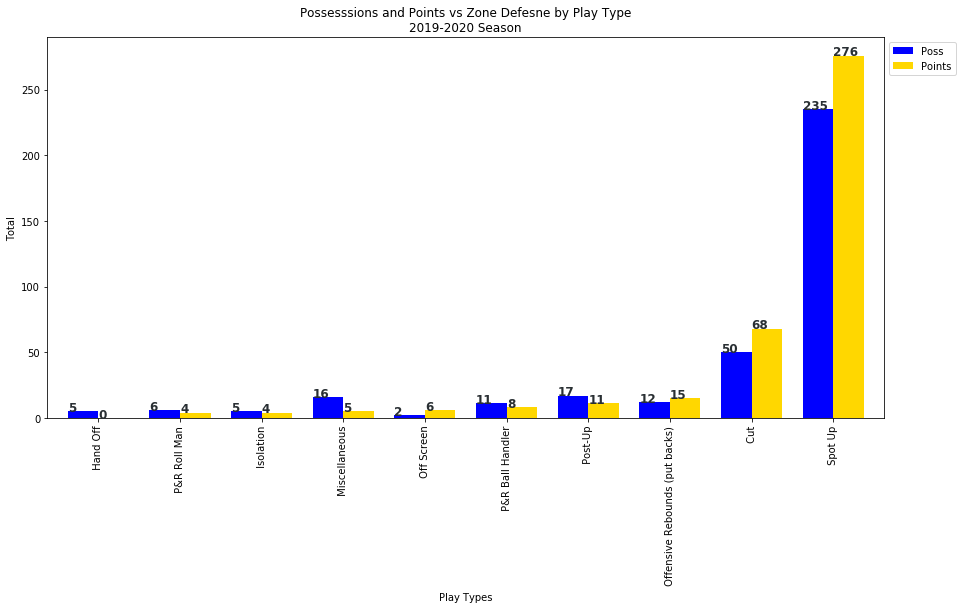

In [11]:
ax = playtypes_zone.sort_values(by='Points').plot(x='Play Types', y=['Poss','Points'], kind="bar",width=.75,color=['Blue','Gold','red'],figsize=(15,7))
plt.ylabel('Total'),plt.title("Possesssions and Points vs Zone Defesne by Play Type\n2019-2020 Season")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+.003, i.get_height()+0.09, \
            str(round((i.get_height()), 2)), fontsize=12, color='#292f33',
                rotation=0,weight='bold')
plt.savefig('Performance_Zone_Def_Play_Type.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=130)

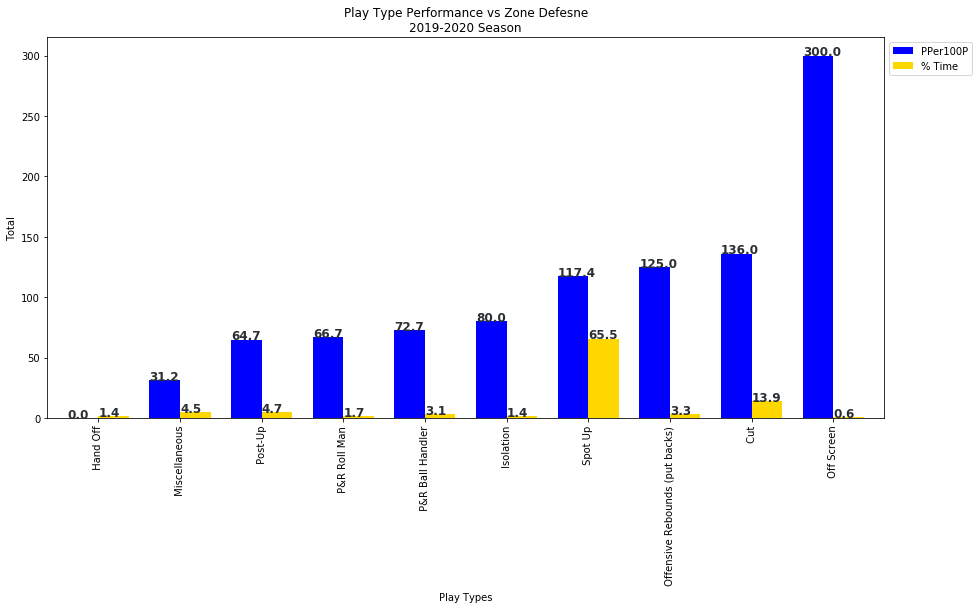

In [12]:
ax = playtypes_zone.sort_values(by='PPer100P').plot(x='Play Types', y=['PPer100P','% Time'], kind="bar",width=.75,color=['Blue','Gold','red'],figsize=(15,7))
plt.ylabel('Total'),plt.title("Play Type Performance vs Zone Defesne\n2019-2020 Season")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+.003, i.get_height()+0.09, \
            str(round((i.get_height()), 2)), fontsize=12, color='#292f33',
                rotation=0,weight='bold')

Now we can see the in barchart above that it would appear that the "Off Screen" plays against zone defense this year has been the best, but since this is based on a very small sample size of just 2 possesions I would suggest it is not very significant and we already know most the possessions and points are from "Spot Ups" play types. 

- Next I want to see is what play types are most efficient based on Points per 100 possesions and turnover percentage or rate. 

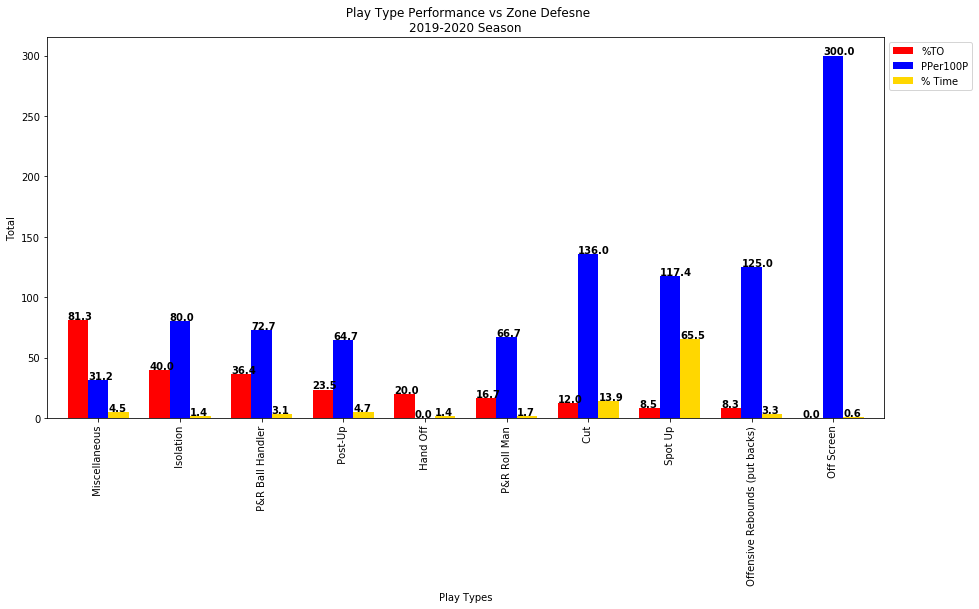

In [13]:
ax = playtypes_zone.sort_values(by='%TO',ascending=False).plot(x='Play Types', y=['%TO','PPer100P','% Time'], kind="bar",width=.75,color=['Red','Blue','Gold'],figsize=(15,7))
plt.ylabel('Total'),plt.title(" Play Type Performance vs Zone Defesne\n2019-2020 Season")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+.0003, i.get_height()+0.7, \
            str(round((i.get_height()), 2)), fontsize=10, color='Black',
                rotation=0,weight='bold')

In the bar chart above that has turnover rate, along with points per 100 possesions, and the rate or percent of time that we run a play against zone defense. For each play type we can see that the play types that yield the highest points per possession against zone defense. The plays with the best net results along with low turnover rates are Offensive Putbacks, Spot Ups, and Cuts. Of these three play types the one we play the use (%Time is the percent of time we run a play vs a defense) the most is Spots Ups which has a very low turnover rate of 8.5% and a high points per possesion.

Now lets take a look team performance player by player against the zone

In [14]:
team_vs_zone

,Overall,% Time,Poss,Points,PPP,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score
0,UC San Diego Tritons,1.000,359,397,1.106,0.9,Excellent,146,137,283,0.484,0.627,0.145,0.081,0.067,0.446
1,#14 Christian Oshita,0.228,82,107,1.305,0.9,Excellent,33,37,70,0.529,0.679,0.049,0.110,0.098,0.537
2,#2 Tyrell Roberts,0.203,73,92,1.260,0.88,Excellent,31,30,61,0.492,0.705,0.123,0.041,0.041,0.452
3,#3 Gabe Hadley,0.134,48,38,0.792,0.34,Average,26,13,39,0.333,0.474,0.188,0.021,0.021,0.271
4,#11 Scott Everman,0.128,46,45,0.978,0.57,Good,22,15,37,0.405,0.486,0.087,0.130,0.087,0.435
5,#32 Mickey Howell,0.084,30,29,0.967,0.56,Good,10,9,19,0.474,0.684,0.267,0.100,0.067,0.400
6,#5 Marek Sullivan,0.081,29,40,1.379,0.93,Excellent,5,17,22,0.773,0.818,0.172,0.103,0.069,0.655
7,#44 Chris Hansen,0.025,9,12,1.333,-,-,1,5,6,0.833,0.833,0.222,0.111,0.111,0.667
8,#25 Martin Tombe,0.019,7,13,1.857,-,-,2,4,6,0.667,0.917,0.000,0.143,0.143,0.714
9,#23 Kadeen Rasheed,0.017,6,2,0.333,-,-,4,1,5,0.200,0.200,0.167,0.000,0.000,0.167


In [15]:
team_vs_zone['PPer100P'] = normalize*team_vs_zone['PPP']

In [16]:
percent_cols=['% Time','FG%','aFG%','%TO','%FT','%SF','%Score']
normalize = 100

for column in team_vs_zone.columns:
    if column in percent_cols:
        team_vs_zone[column]=team_vs_zone[column]*normalize

In [17]:
# Drop players whom have less than 25 possesions
df3 = team_vs_zone.drop([0,7,8,9,10,11,12,13,14,15])

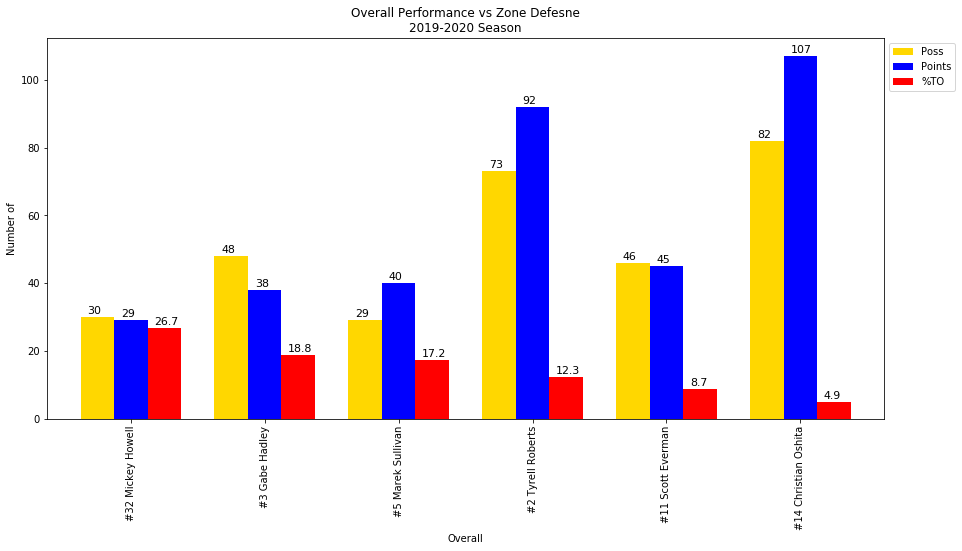

In [18]:
ax = df3.sort_values(by='%TO',ascending=False).plot(x='Overall', y=['Poss','Points','%TO'], kind="bar",width=.75,color=['Gold','Blue','red'],figsize=(15,7))
plt.ylabel('Number of'),plt.title("Overall Performance vs Zone Defesne\n2019-2020 Season")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+1, \
            str(round((i.get_height()), 2)), fontsize=11, color='Black',
                rotation=0)
# plt.savefig('Overall_Performance_vs_Zone_Def.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=130)

The bar chart above has the starting/main players performance vs zone weighted by the rate they turnover the ball, their possesions, and their points scored. We can see the our top performers in these categories are Tyrell, Scott, and Christian, while Mickey Howell and Gabe performed worse against zone, and Marek was about at his average although you could say the same for Mickey as well. 


Out of all the players Gabe is the one I am concerned with since we use him vs zone often due to his shooting, but unfortunately his effective field goal percentage is below is average vs man (Look below to see his numbers and difference between them). 

In [19]:
# Grab data of Gabe vs Man and Zone
gabe_vsZone = team_vs_zone.loc[team_vs_zone['Overall'] == '#3 Gabe Hadley']
gabe_vsMan = team_vs_man.loc[team_vs_man['Overall'] == '#3 Gabe Hadley']

gabe_vsMan

,Overall,% Time,Poss,Points,PPP,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score
5,#3 Gabe Hadley,0.089,115,145,1.261,0.99,Excellent,51,51,102,0.5,0.657,0.078,0.061,0.052,0.478


In [20]:
gabe_vsZone

,Overall,% Time,Poss,Points,PPP,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score,PPer100P
3,#3 Gabe Hadley,13.4,48,38,0.792,0.34,Average,26,13,39,33.3,47.4,18.8,2.1,2.1,27.1,79.2


In [47]:
# Look at Gabe eFG% which in our data from synergy is denoted as aFG%
print('Gabe\'s eFG% vs zone defense: '+str(gabe_vsZone['aFG%'].values[0]))
print('Gabe\'s eFG% vs man defense: '+str(normalize*gabe_vsMan['aFG%'].values[0]))

Gabe's eFG% vs zone defense: 47.4
Gabe's eFG% vs man defense: 65.7


Looking above at the two data frames we can see that Gabe shooting performane is not different against zone defense. 

## Performance Analysis Tritons Vs Man

In [23]:
# I want to have a expected points per 100 possesion..
team_vs_man['PPer100P'] = normalize*team_vs_man['PPP']
team_vs_man.sort_values(by='PPer100P', ascending=False)

,Overall,% Time,Poss,Points,PPP,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score,PPer100P
7,#44 Chris Hansen,0.080,104,139,1.337,1,Excellent,38,50,88,0.568,0.670,0.058,0.115,0.087,0.577,133.7
5,#3 Gabe Hadley,0.089,115,145,1.261,0.99,Excellent,51,51,102,0.500,0.657,0.078,0.061,0.052,0.478,126.1
3,#11 Scott Everman,0.120,156,190,1.218,0.98,Excellent,61,74,135,0.548,0.641,0.077,0.077,0.064,0.532,121.8
6,#5 Marek Sullivan,0.085,110,129,1.173,0.96,Excellent,32,53,85,0.624,0.647,0.109,0.136,0.100,0.591,117.3
2,#14 Christian Oshita,0.182,237,272,1.148,0.95,Excellent,95,93,188,0.495,0.620,0.097,0.122,0.068,0.494,114.8
10,#23 Kadeen Rasheed,0.016,21,24,1.143,0.94,Excellent,6,8,14,0.571,0.750,0.238,0.143,0.095,0.476,114.3
0,UC San Diego Tritons,1.000,1299,1437,1.106,1,Excellent,501,510,1011,0.504,0.602,0.121,0.119,0.075,0.487,110.6
1,#2 Tyrell Roberts,0.219,285,306,1.074,0.88,Excellent,129,106,235,0.451,0.549,0.088,0.098,0.056,0.456,107.4
9,#25 Martin Tombe,0.022,28,29,1.036,0.83,Excellent,11,6,17,0.353,0.500,0.143,0.250,0.107,0.464,103.6
12,#12 Justin Pratt,0.012,16,16,1.000,0.78,Very Good,6,7,13,0.538,0.577,0.125,0.125,0.125,0.500,100.0


In [24]:
percent_cols=['% Time','FG%','aFG%','%TO','%FT','%SF','%Score']
normalize = 100

for column in team_vs_man.columns:
    if column in percent_cols:
        team_vs_man[column]=team_vs_man[column]*normalize

In [25]:
df4 = team_vs_man.drop([0,7,10,11,12,13,14,15,16])

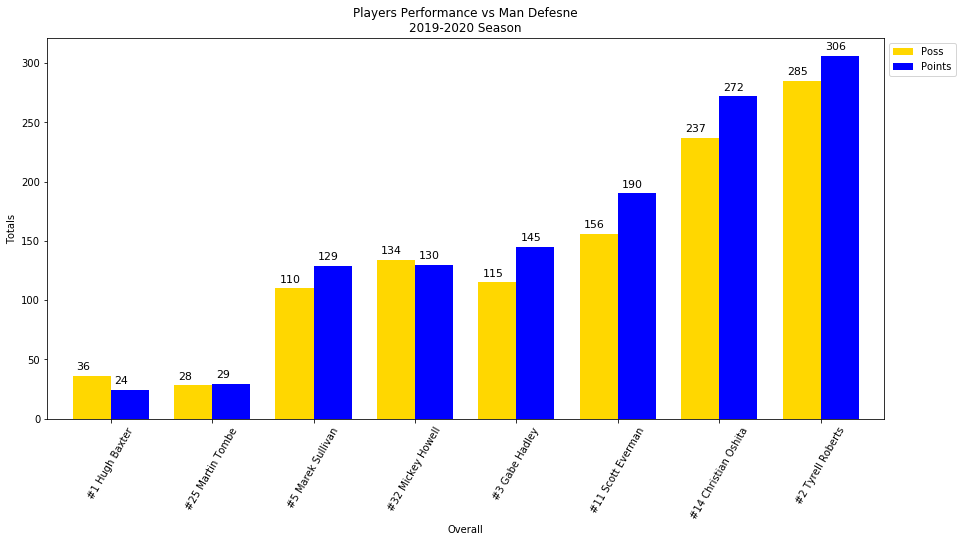

In [26]:
ax = df4.sort_values(by='Points').plot(x='Overall', y=['Poss','Points'], kind="bar",width=.75,color=['Gold','Blue',],figsize=(15,7))
plt.ylabel('Totals'),plt.title("Players Performance vs Man Defesne\n2019-2020 Season"),plt.xticks(rotation=60)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=11, color='Black',
                rotation=0)
plt.savefig('Rotation Players Performance vs Man Defesne.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=130)

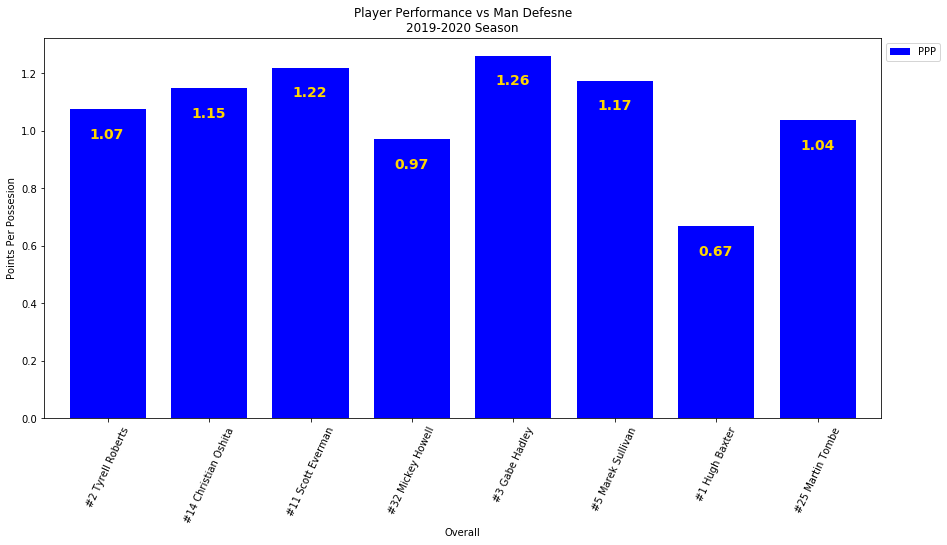

In [27]:
ax = df4.plot(x='Overall', y=['PPP'], kind="bar",width=.75,color=['blue'],figsize=(15,7))
plt.ylabel('Points Per Possesion'),plt.title("Player Performance vs Man Defesne\n2019-2020 Season"),plt.xticks(rotation=65)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()-0.1, \
            str(round((i.get_height()), 2)), fontsize=14, color='Gold',
                rotation=0,weight='bold')
# plt.savefig('main_rotation_ZoneDef_performance.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=130)

In [28]:
playtypes_man

,Play Types,% Time,Poss,Points,PPP,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score
0,Spot Up,0.280,364,415,1.140,0.99,Excellent,178,139,317,0.438,0.603,0.074,0.060,0.049,0.431
1,Transition,0.170,221,257,1.163,0.94,Excellent,77,87,164,0.530,0.631,0.131,0.149,0.109,0.520
2,P&R Ball Handler,0.149,194,187,0.964,0.95,Excellent,72,71,143,0.497,0.556,0.175,0.113,0.082,0.448
3,P&R Roll Man,0.080,104,109,1.048,0.64,Good,51,40,91,0.440,0.549,0.077,0.058,0.048,0.433
4,Cut,0.075,97,163,1.680,1.00,Excellent,12,70,82,0.854,0.854,0.031,0.196,0.186,0.825
5,Post-Up,0.046,60,64,1.067,0.97,Excellent,21,28,49,0.571,0.571,0.100,0.083,0.067,0.550
6,Off Screen,0.040,52,58,1.115,0.89,Excellent,26,20,46,0.435,0.598,0.077,0.038,0.038,0.423
7,Offensive Rebounds (put backs),0.040,52,65,1.250,0.92,Excellent,15,29,44,0.659,0.670,0.096,0.077,0.058,0.615
8,Isolation,0.037,48,42,0.875,0.70,Very Good,23,15,38,0.395,0.447,0.125,0.125,0.104,0.396
9,Hand Off,0.025,32,25,0.781,0.37,Average,17,9,26,0.346,0.404,0.125,0.094,0.094,0.344


In [29]:
percent_cols=['% Time','FG%','aFG%','%TO','%FT','%SF','%Score']
normalize = 100

for column in playtypes_man.columns:
    if column in percent_cols:
        playtypes_man[column]=playtypes_man[column]*normalize

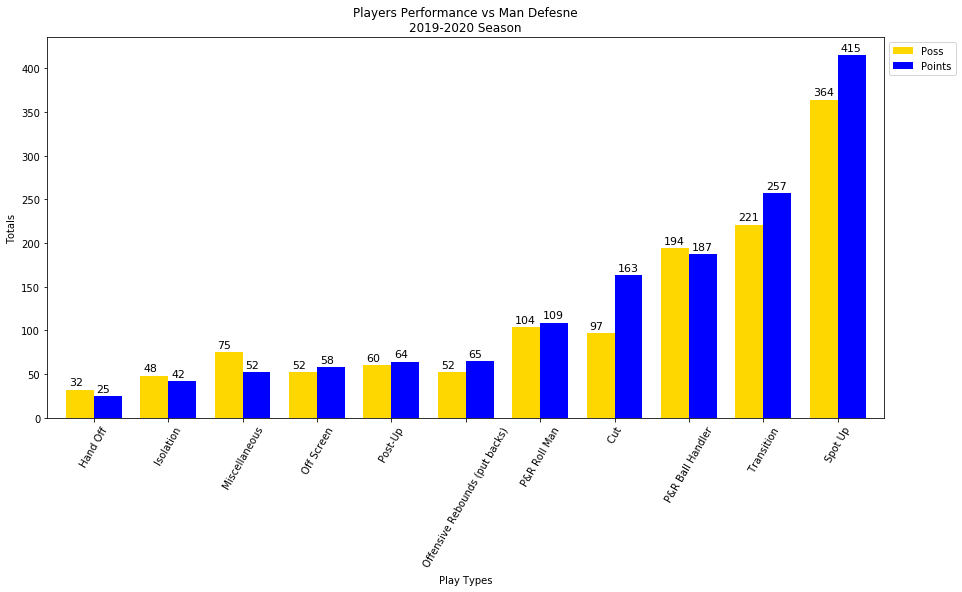

In [30]:
ax = playtypes_man.sort_values(by='Points').plot(x='Play Types', y=['Poss','Points'], kind="bar",width=.75,color=['Gold','Blue',],figsize=(15,7))
plt.ylabel('Totals'),plt.title("Players Performance vs Man Defesne\n2019-2020 Season"),plt.xticks(rotation=60)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=11, color='Black',
                rotation=0)

In [31]:
playtypes_man['PPer100P'] = normalize*playtypes_man['PPP']

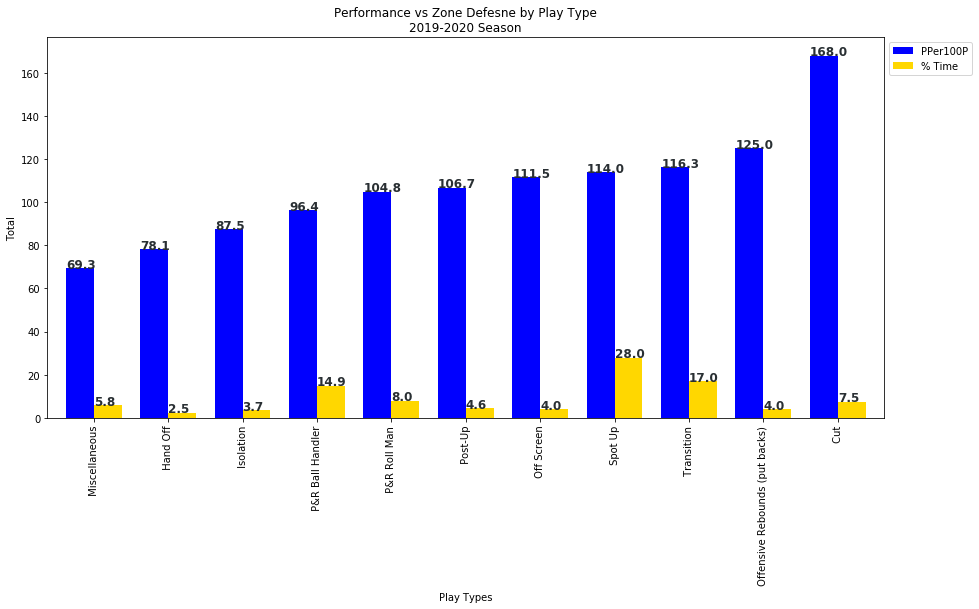

In [32]:
ax = playtypes_man.sort_values(by='PPer100P').plot(x='Play Types', y=['PPer100P','% Time'], kind="bar",width=.75,color=['Blue','Gold','red'],figsize=(15,7))
plt.ylabel('Total'),plt.title("Performance vs Zone Defesne by Play Type\n2019-2020 Season")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+.003, i.get_height()+0.09, \
            str(round((i.get_height()), 2)), fontsize=12, color='#292f33',
                rotation=0,weight='bold')

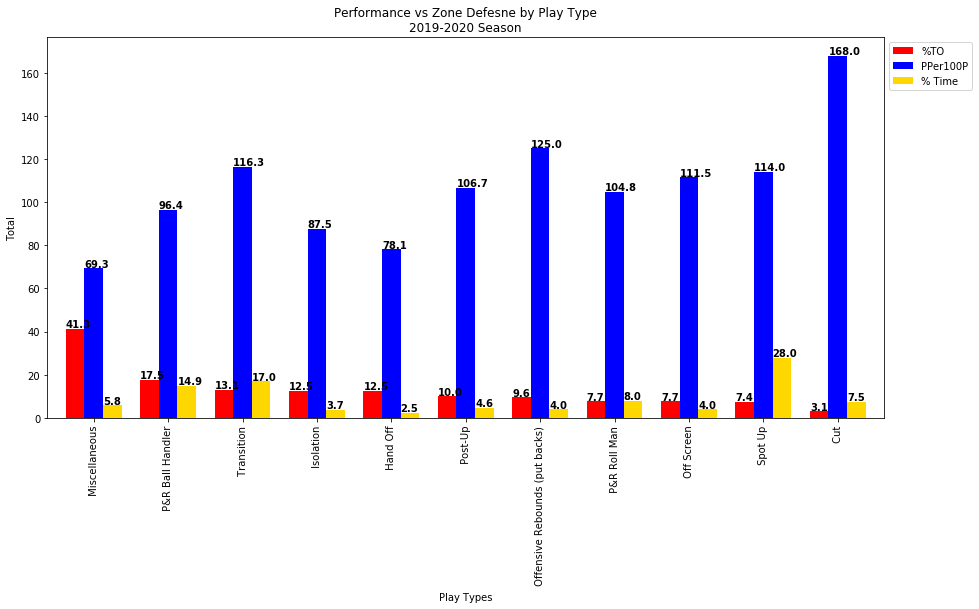

In [33]:
ax = playtypes_man.sort_values(by='%TO',ascending=False).plot(x='Play Types', y=['%TO','PPer100P','% Time'], kind="bar",width=.75,color=['Red','Blue','Gold'],figsize=(15,7))
plt.ylabel('Total'),plt.title("Performance vs Zone Defesne by Play Type\n2019-2020 Season")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+.0003, i.get_height()+0.7, \
            str(round((i.get_height()), 2)), fontsize=10, color='Black',
                rotation=0,weight='bold')

In [34]:
df5 = pd.read_excel('OffvsMan_Zone19_20.xlsx', sheet_name='TeamVsZoneandMan')
df5['%Time'] = [.78,.22]
df5=df5.drop(columns=['% Time','PPP'])

In [35]:
Avg_PPP_againstMan = sum(playtypes_man['PPP'])/len(playtypes_man['PPP'])
Avg_PPP_againstMan

1.0705454545454545

In [36]:
df5['Avg_PPP'] = [Avg_PPP_againstMan,Avg_PPP_againstZone]

In [37]:
df5['%Time'] = df5['%Time']*normalize

In [38]:
df5['Avg_PPer100P'] = df5['Avg_PPP']*normalize

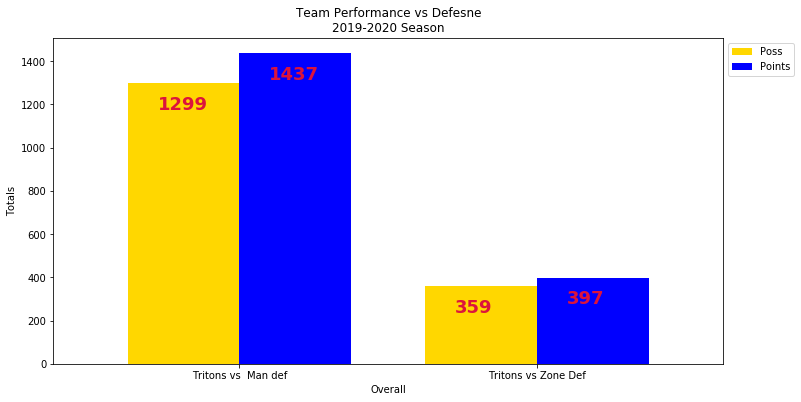

In [39]:
ax = df5.plot(x='Overall', y=['Poss','Points'], kind="bar",width=.75,color=['Gold','Blue',],figsize=(12,6))
plt.ylabel('Totals'),plt.title("Team Performance vs Defesne\n2019-2020 Season"),plt.xticks(rotation=0)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+0.0998, i.get_height()-120, \
            str(round((i.get_height()), 2)), fontsize=18, color='#DC143C',
                rotation=0,weight='bold')

In [40]:
df5

,Overall,Poss,Points,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score,%Time,Avg_PPP,Avg_PPer100P
0,Tritons vs Man def,1299,1437,1.0,Excellent,501,510,1011,0.504,0.602,0.121,0.119,0.075,0.487,78.0,1.070545,107.054545
1,Tritons vs Zone Def,359,397,0.9,Excellent,146,137,283,0.484,0.627,0.145,0.081,0.067,0.446,22.0,0.993700,99.370000


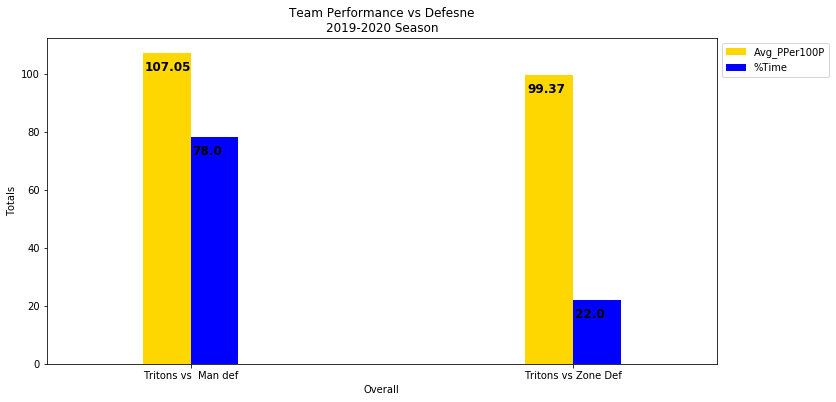

In [41]:
ax = df5.plot(x='Overall', y=['Avg_PPer100P','%Time'], kind="bar",width=.25,color=['Gold','Blue'],figsize=(12,6))
plt.ylabel('Totals'),plt.title("Team Performance vs Defesne\n2019-2020 Season"),plt.xticks(rotation=0)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+0.004, i.get_height()-6, \
            str(round((i.get_height()), 2)), fontsize=12, color='Black',
                rotation=0,weight='bold')

In [42]:
df5

,Overall,Poss,Points,Rank,Rating,FGm,FGM,FGA,FG%,aFG%,%TO,%FT,%SF,%Score,%Time,Avg_PPP,Avg_PPer100P
0,Tritons vs Man def,1299,1437,1.0,Excellent,501,510,1011,0.504,0.602,0.121,0.119,0.075,0.487,78.0,1.070545,107.054545
1,Tritons vs Zone Def,359,397,0.9,Excellent,146,137,283,0.484,0.627,0.145,0.081,0.067,0.446,22.0,0.993700,99.370000


In [45]:
df7 = pd.DataFrame()
df7['Overall'] = team_vs_man['Overall']
df7['PPP_vs_Man'] = team_vs_man['PPP']
# because some of the players did not match in zone and man datasets I manually entered them
df7['PPP_vs_Zone'] = [1.106,1.260,1.305,0.978,0.967,0.792,1.379,1.333,0.833,1.857,\
                    0.333,0.600,0.600,0.400,0.000,0.000,1.200]

In [46]:
df7

,Overall,PPP_vs_Man,PPP_vs_Zone
0,UC San Diego Tritons,1.106,1.106
1,#2 Tyrell Roberts,1.074,1.260
2,#14 Christian Oshita,1.148,1.305
3,#11 Scott Everman,1.218,0.978
4,#32 Mickey Howell,0.970,0.967
5,#3 Gabe Hadley,1.261,0.792
6,#5 Marek Sullivan,1.173,1.379
7,#44 Chris Hansen,1.337,1.333
8,#1 Hugh Baxter,0.667,0.833
9,#25 Martin Tombe,1.036,1.857


In [ ]:
# I want to see how the rotation players PPP is affected by type of defense.

ax = df7.drop([0,7,9,10,11,12,13,14,15,16]).reset_index(drop=True).plot(x='Overall', y=['PPP_vs_Man','PPP_vs_Zone'], kind="bar",width=.9,color=['Gold','Blue'],figsize=(15,7))
plt.ylabel('Totals'),plt.title("Player Performance vs Defesne\n2019-2020 Season"),plt.xticks(rotation=77)
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))
for i in ax.patches:
    ax.text(i.get_x()+0.08, i.get_height()-0.07, \
            str(round((i.get_height()), 2)), fontsize=13, color='Red',
                rotation=0,weight='bold')

Looking at the barchart above we can see how each of the main rotation players average PPP performance against man and zone defenses. I will list some of the interesting things I see:

   - Scott Everman performs much better against man defense, not exctly sure why as of yet but I can say that he faces it less then he faces man defenses. Also he is a good shooter, but I believe he gets less attempts and lower quality shots against zone defense because essentially most zone schemes keep big men out of the game and Scott is our center at the moment. 
   
   
   - Gabe Hadley performs pourly against zone defense which is a bit concerning because he is our main three-point threat outside of Tyrell and Christian and we would expect him to get some good open shots from the midrange/three-point area. I will look more into the film and see if there is any reason for his performance vs zone but I can think of many reasons why this happens. Zone defense is used often when teams are already down big and need to stop easy buckets but they are out matched man to man vs their opponent. Gabe being a bench player plays without starters in the line up and gets less open shots and is forced to work a lot more against the zone. He also faces zone the most compared to man which makes me believe my assumptions are correct. I will plot a graph to illustrate how often each player faces a defense below along with other player....
   
   
   - Hugh does not play often and is the worst performer in this graph but due to his lack of play time and scoring I believe looking at these metrics does not tell much about his performance. 

In [ ]:
df7

## A Fair Warning:
Everything Below This is just me nerding out with graphs, and data. 

I wanted to check out various density graphs and much more that might be useful later.



In [ ]:
# sns.distplot( a=df4["Poss"], hist=True, kde=True, rug=True )
# #sns.plt.show()
 
# To change parameters of rug
sns.distplot( a=df4["Poss"], rug=True,
rug_kws={"color":'r', "alpha":0.3, "linewidth": 2, "height":0.2 }
)
 
# To change parameters of density distribution
sns.distplot( a=df4["Poss"], kde=True,
kde_kws={"color": "gold", "alpha":0.3, "linewidth": 5, "shade":True })
